* Name : Joonyoung-Choi
* Student ID: 20112096
* Description: Image denoising using least square regularization
* github: https://github.com/mydream757/Computer_Vision

1. Import libraries

* import needed libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import coo_matrix
from scipy import signal
from skimage import io, color
from skimage import exposure

2. Set the image

* bring an image. I resized the given image to smaller one

In [2]:
file_image	= 'cau-1.jpg'
#read and set the image
im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

* generate a noise image

In [3]:
#generate noise
noise_std   = 0.2 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise

* image vectorization

In [4]:
#this is vectorization of the image
im_vector = im_noise.reshape(row*col)
n = im_vector.size

3. Define functions

* create_A makes least square, 'A'

In [5]:
#the function returns 'A'
def create_A(t):
    eigen  = np.eye(n-1,n)
    dX  = np.roll(eigen,1)
    minus = -np.eye(n-1,n)
    dX = dX + minus
    dY = minus
    for i in range(n-2):
        for k in range(n-1):
            if k+col<n-1 and dY[i][k]==-1:
                dY[i][k+col] = 1
    a_first = np.eye(row*col)

    A = np.vstack((a_first,np.sqrt(t)*dX))
    A = np.vstack((A,np.sqrt(t)*dY))

    return A;

* create_B makes least square, 'b'

In [6]:
#the function returns 'b'
def create_B(t):

    b_first = im_vector.reshape((n,1))
    b_second = np.zeros((n-1,1))
    b = np.vstack((b_first,b_second))
    b = np.vstack((b,b_second))
    return b;

4. Result of varing lamda

* iterate and show the results

lamda:  0.03125


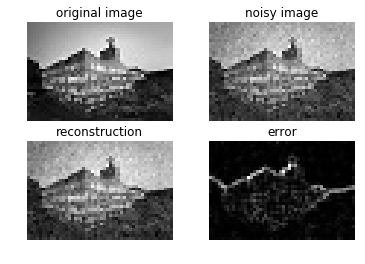

lamda:  0.0625


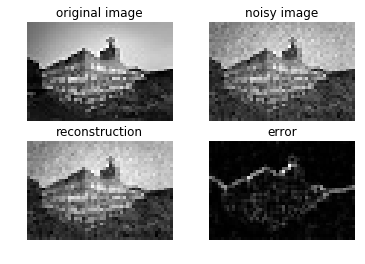

lamda:  0.125


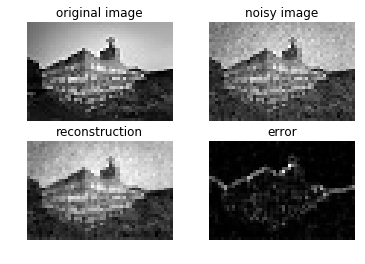

lamda:  0.25


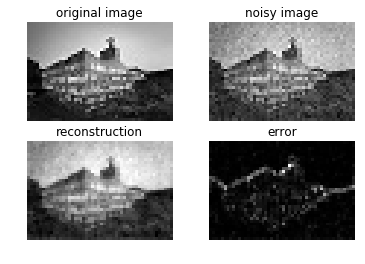

lamda:  0.5


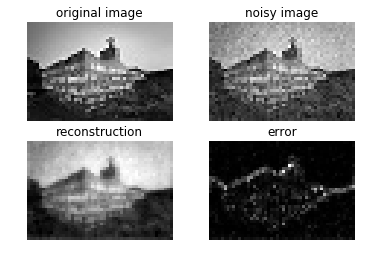

lamda:  1


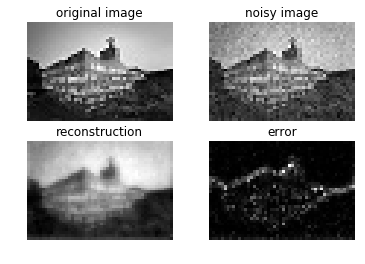

lamda:  2


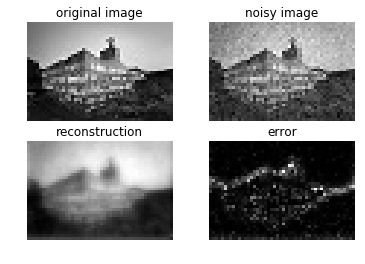

lamda:  4


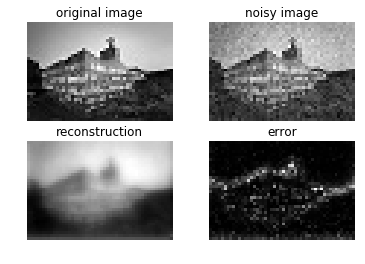

lamda:  8


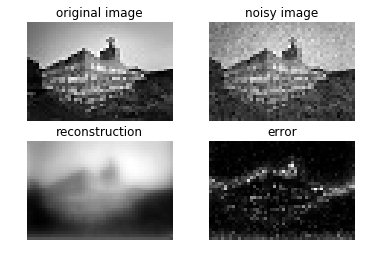

lamda:  16


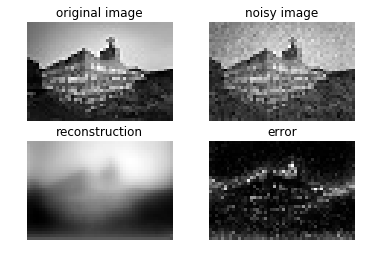

lamda:  32


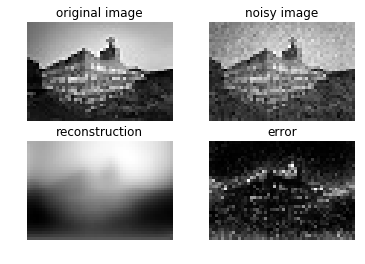

In [7]:
#iteration 11 times
for i in range(11):
    
    l = pow(2,i-5)
    #solve the least square problem.
    ans = np.dot(np.linalg.pinv(create_A(l)),create_B(l))

    #reshape to show image
    im_recon = ans.reshape((row,col))
    #gradient for computing error 
    dX,dY = np.gradient(im_recon)
    #use sparse matrix because of matrix overflow
    dX  = coo_matrix(dX)
    dY  = coo_matrix(dY)

    dX2 = dX.multiply(dX).todense()
    dY2 = dY.multiply(dY).todense()

    #compute error
    error = (im_recon-im_noise)**2 + l*(dX2+dY2)
    #show the result
    print('lamda: ', l)
    p1 = plt.subplot(2,2,1)
    p1.set_title('original image')
    plt.imshow(im, cmap='gray')
    plt.axis('off')

    p2 = plt.subplot(2,2,2)
    p2.set_title('noisy image')
    plt.imshow(im_noise, cmap='gray')
    plt.axis('off')

    p3 = plt.subplot(2,2,3)
    p3.set_title('reconstruction')
    plt.imshow(im_recon, cmap='gray')
    plt.axis('off')

    p4 = plt.subplot(2,2,4)
    p4.set_title('error')
    plt.imshow(error, cmap='gray')
    plt.axis('off')

    plt.show()
